<a href="https://colab.research.google.com/github/ankeshkmr2010/ml_and_ann/blob/main/cifar10_gpu_strat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
#plot the first image in the dataset
plt.imshow(X_train[0])

NameError: ignored

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [8]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 10)                184330    
                                                                 
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 132s 70ms/step - loss: 0.2403 - accuracy: 0.9512 - val_loss: 0.0946 - val_accuracy: 0.9720
Epoch 2/3
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0667 - accuracy: 0.9791 - val_loss: 0.0877 - val_accuracy: 0.9739
Epoch 3/3
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0843 - val_accuracy: 0.9764


In [ ]:
model.predict(X_test[:4])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Conv3D, Flatten, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [32]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train[0]

array([6], dtype=uint8)

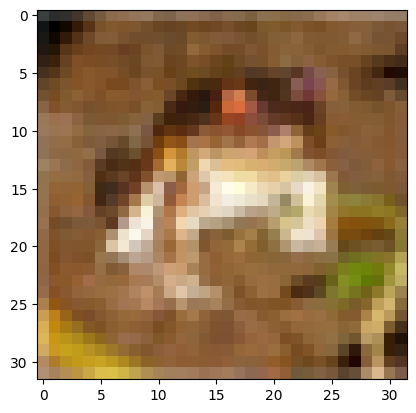

In [11]:
plt.imshow(x_train[0])

In [16]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [10]:
from keras.layers import MaxPooling2D
from keras.layers import Rescaling
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_logical_devices('GPU')
strategy = tf.distribute.MirroredStrategy(gpus)

Num GPUs Available:  1


In [52]:
with strategy.scope():
  model = Sequential()
  #add model layers
  model.add(Rescaling(1./255,input_shape=(32,32,3)))
  model.add(Conv2D(128, kernel_size=3, activation='relu' ))
  model.add(MaxPooling2D((2, 2)))
  model.add(tf.keras.layers.BatchNormalization(synchronized=True))
  model.add(Conv2D(64, kernel_size=3, activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(32, kernel_size=3, activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(tf.keras.layers.BatchNormalization(synchronized=True))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(tf.keras.layers.BatchNormalization(synchronized=True))
  model.add(Dense(10, activation='softmax'))

In [53]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_29 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_18 (Bat  (None, 15, 15, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_30 (Conv2D)          (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 6, 6, 64)       

In [54]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [55]:
with strategy.scope():
  history = model.fit(x_train, y_train, batch_size=512,validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
98/98 [==============================] - 10s 57ms/step - loss: 1.8825 - accuracy: 0.3361 - val_loss: 2.7439 - val_accuracy: 0.1461
Epoch 2/50
98/98 [==============================] - 5s 48ms/step - loss: 1.4038 - accuracy: 0.4921 - val_loss: 3.0323 - val_accuracy: 0.1022
Epoch 3/50
98/98 [==============================] - 4s 43ms/step - loss: 1.2215 - accuracy: 0.5614 - val_loss: 2.7208 - val_accuracy: 0.1504
Epoch 4/50
98/98 [==============================] - 5s 46ms/step - loss: 1.1012 - accuracy: 0.6072 - val_loss: 2.5117 - val_accuracy: 0.1922
Epoch 5/50
98/98 [==============================] - 4s 46ms/step - loss: 1.0213 - accuracy: 0.6371 - val_loss: 2.2275 - val_accuracy: 0.2905
Epoch 6/50
98/98 [==============================] - 4s 45ms/step - loss: 0.9486 - accuracy: 0.6636 - val_loss: 1.3921 - val_accuracy: 0.5212
Epoch 7/50
98/98 [==============================] - 4s 45ms/step - loss: 0.8889 - accuracy: 0.6863 - val_loss: 1.0889 - val_accuracy: 0.6252
Epoch 8/50
9

In [1]:
import matplotlib.pyplot as plt
epochs = 50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: ignored

In [2]:
# https://www.tensorflow.org/guide/gpu#overview
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_logical_devices('GPU')
strategy = tf.distribute.MirroredStrategy(gpus)

Num GPUs Available:  1
